In [ ]:
# import tensorflow.keras as keras
import tensorflow as tf
import keras

In [ ]:
from keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 29s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

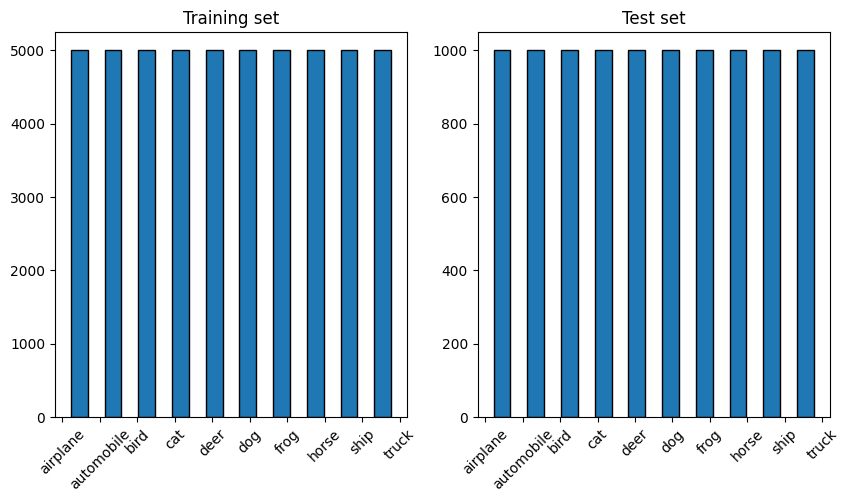

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Count the number of examples per class in the training and test sets
train_counts = np.bincount(y_train.flatten())
test_counts = np.bincount(y_test.flatten())

# Plot the histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(y_train, bins=len(train_counts), edgecolor='black',rwidth=0.5)
ax1.set_xticks(np.arange(10))
ax1.set_xticklabels(class_names, rotation=45)
ax1.set_title('Training set')

ax2.hist(y_test, bins=len(test_counts), edgecolor='black',rwidth=0.5)
ax2.set_xticks(np.arange(10))
ax2.set_xticklabels(class_names, rotation=45)
ax2.set_title('Test set')

plt.show()


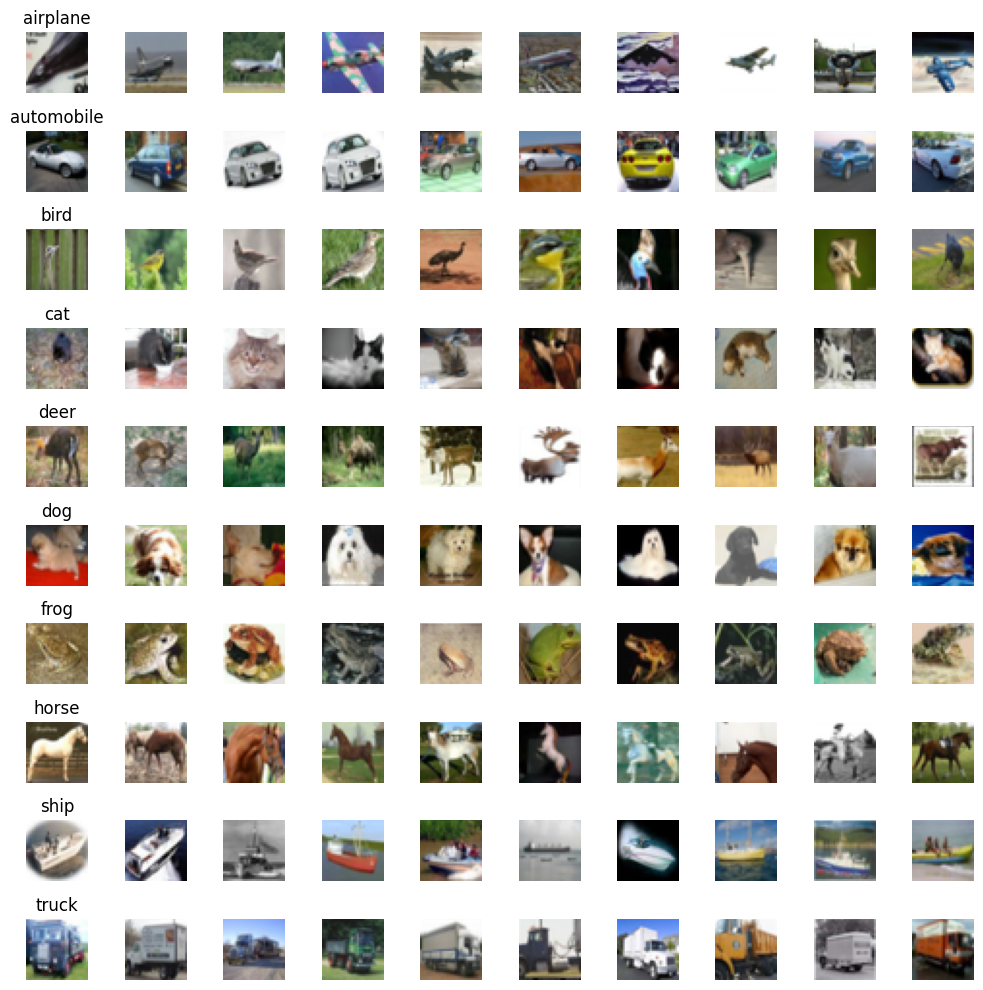

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create a figure with 10 subplots for each class
fig, ax = plt.subplots(10, 10, figsize=(10, 10))

# Loop over each class and select 10 random examples
for i in range(len(class_names)):
    class_indices = np.where(y_train == i)[0]
    selected_indices = np.random.choice(class_indices, 10, replace=False)
    for j, idx in enumerate(selected_indices):
        # Display image in subplot
        ax[i, j].imshow(x_train[idx])
        ax[i, j].axis('off')
        # Set title as class name
        if j == 0:
            ax[i, j].set_title(class_names[i])

plt.tight_layout()
plt.show()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train = x_train.astype('float32') / 255

x_test = x_test.astype('float32') / 255

In [ ]:
x_train.dtype

dtype('float32')

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
my_model = model.fit(x_train, y_train, epochs=10,batch_size=64, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 77s 99ms/step - loss: 0.9374 - accuracy: 0.6706 - val_loss: 0.9371 - val_accuracy: 0.6707
Epoch 2/10
782/782 [==============================] - 75s 95ms/step - loss: 0.8727 - accuracy: 0.6925 - val_loss: 0.9152 - val_accuracy: 0.6756
Epoch 3/10
782/782 [==============================] - 79s 101ms/step - loss: 0.8276 - accuracy: 0.7110 - val_loss: 0.8934 - val_accuracy: 0.6884
Epoch 4/10
782/782 [==============================] - 76s 98ms/step - loss: 0.7826 - accuracy: 0.7244 - val_loss: 0.8732 - val_accuracy: 0.6962
Epoch 5/10
782/782 [==============================] - 74s 94ms/step - loss: 0.7388 - accuracy: 0.7397 - val_loss: 0.8639 - val_accuracy: 0.7016
Epoch 6/10
782/782 [==============================] - 76s 97ms/step - loss: 0.7065 - accuracy: 0.7535 - val_loss: 0.8692 - val_accuracy: 0.7035
Epoch 7/10
782/782 [==============================] - 72s 93ms/step - loss: 0.6773 - accuracy: 0.7630 - val_loss: 0.8459 - val_accuracy

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.8685 - accuracy: 0.7184


In [ ]:
test_acc

0.7184000015258789

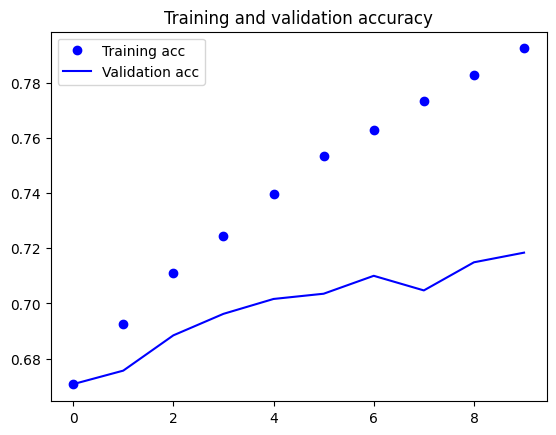

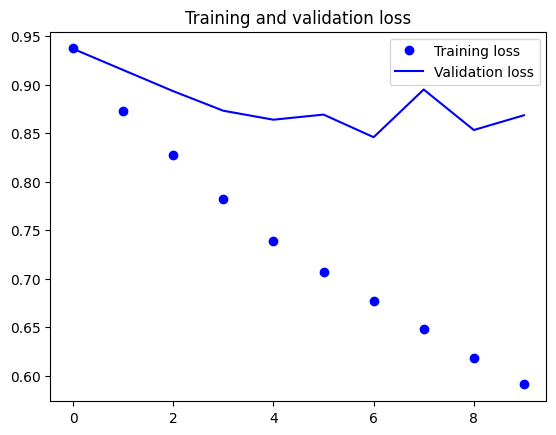

In [ ]:
acc = my_model.history['accuracy']
val_acc = my_model.history['val_accuracy']
loss = my_model.history['loss']
val_loss = my_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()